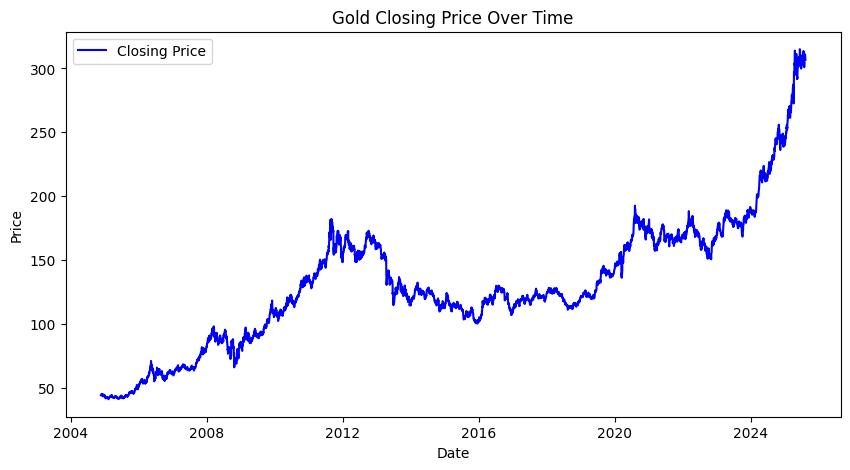

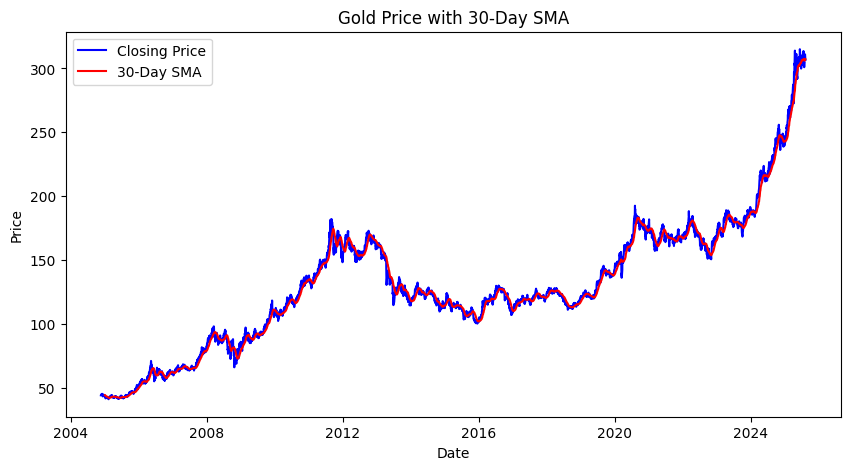

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Rashmii\Downloads\gold_price_data.csv")

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Closing Price', color='blue')
plt.title("Gold Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

df['SMA_30'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Closing Price', color='blue')
plt.plot(df['SMA_30'], label='30-Day SMA', color='red')
plt.title("Gold Price with 30-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\Rashmii\Downloads\gold_price_data.csv")
df

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100
...,...,...,...,...,...,...,...
5210,2025-08-06,310.500000,310.500000,311.239990,309.839996,310.320007,7418200
5211,2025-08-07,313.119995,313.119995,313.140015,310.700012,311.720001,10891500
5212,2025-08-08,313.049988,313.049988,313.529999,311.000000,312.350006,19886800
5213,2025-08-11,308.549988,308.549988,309.660004,307.630005,308.619995,10326700


In [8]:
df.shape

(5215, 7)

In [9]:
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [10]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [11]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [12]:
df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


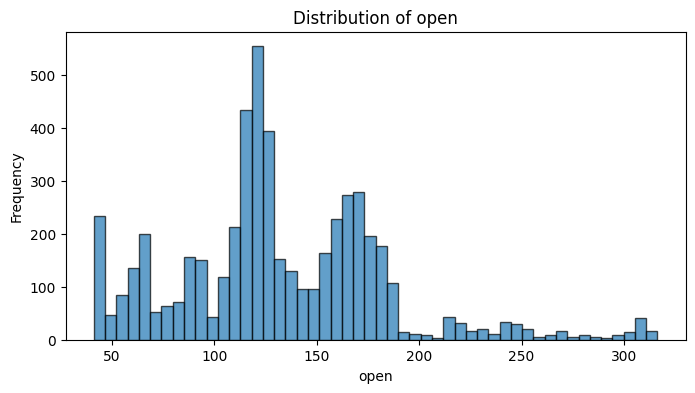

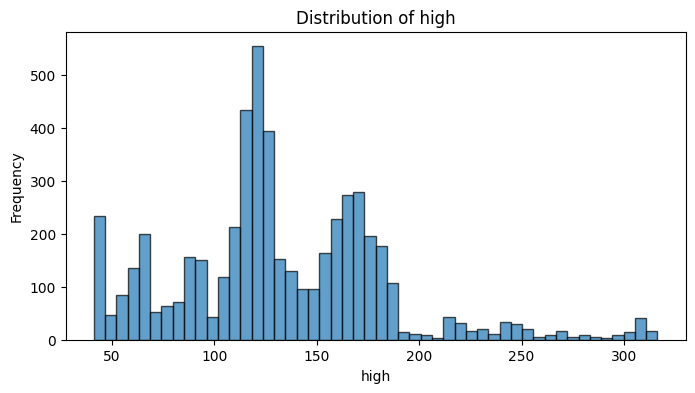

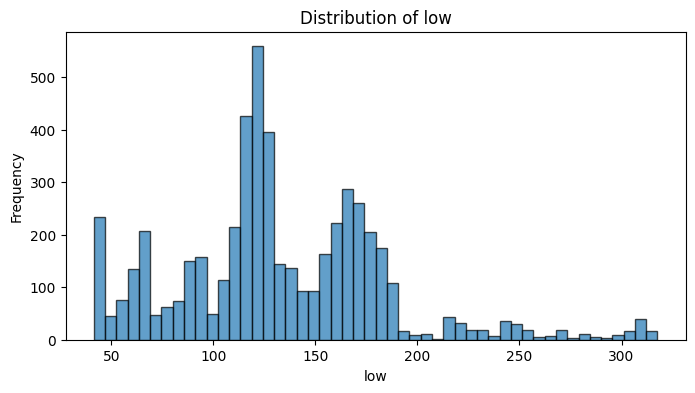

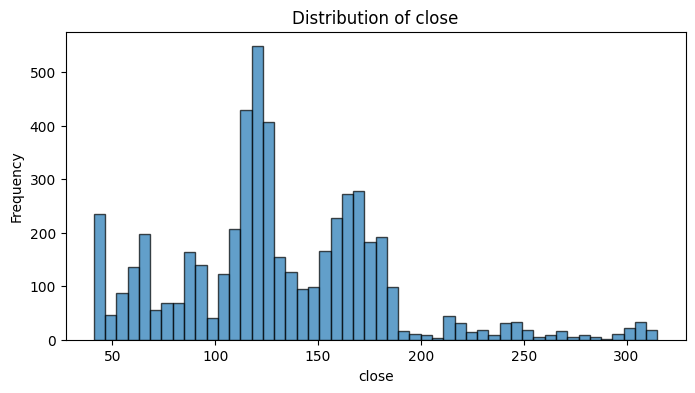

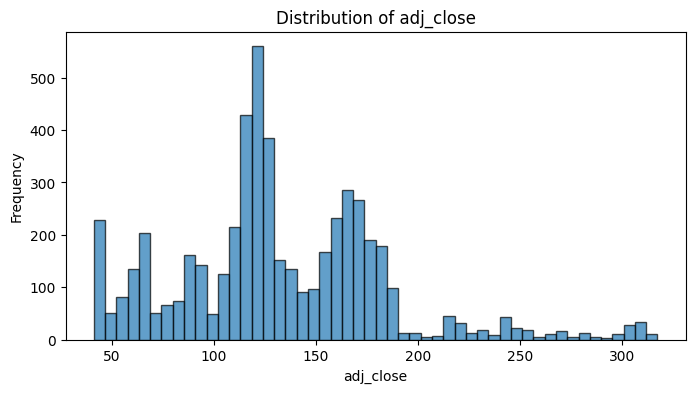

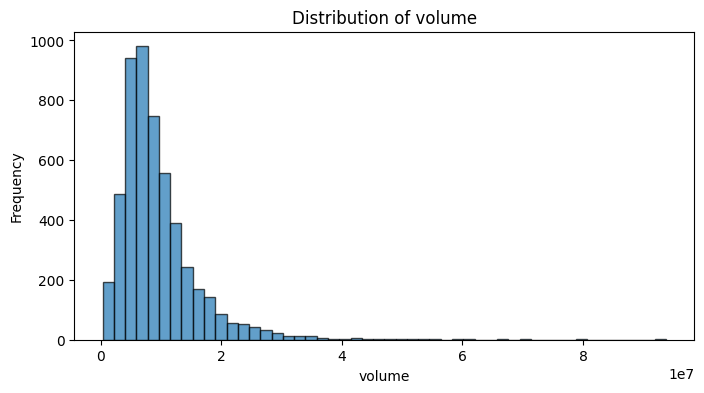

In [13]:
features = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in features:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

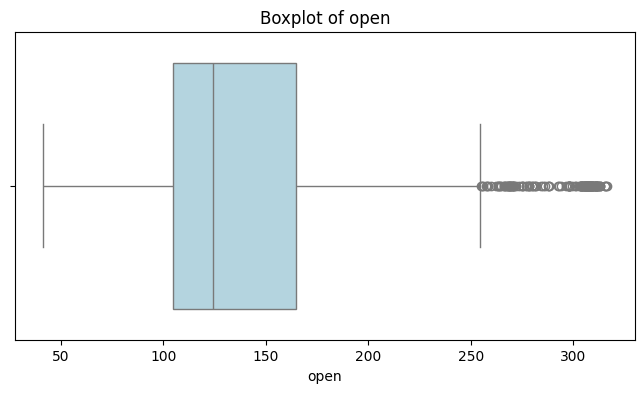

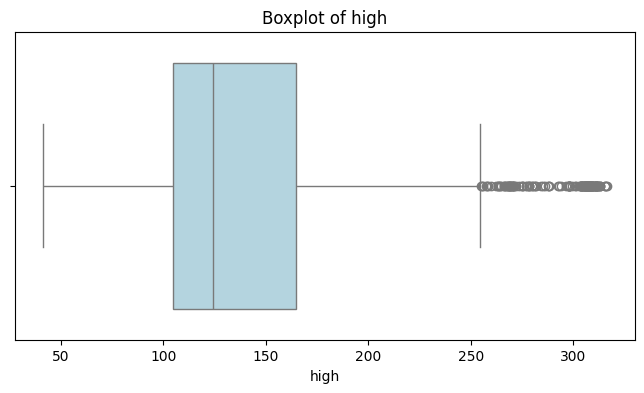

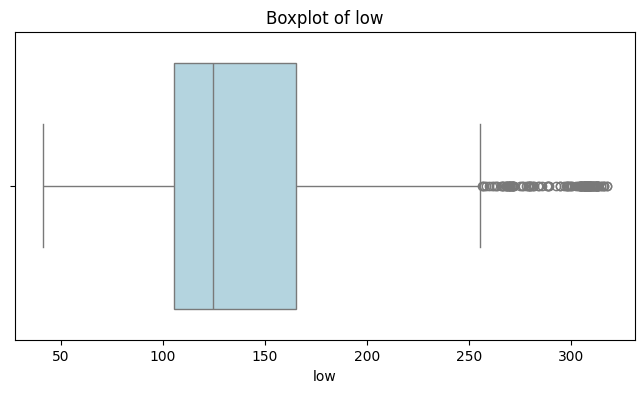

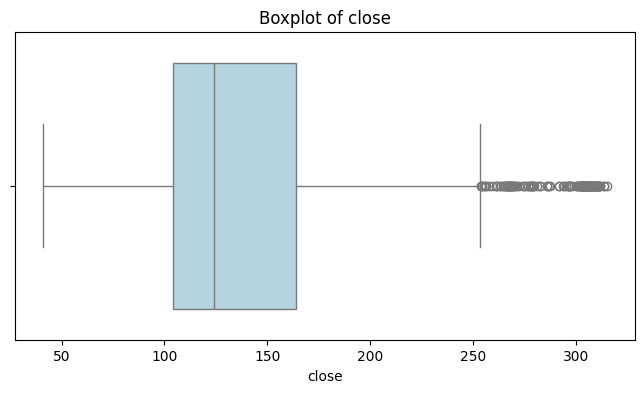

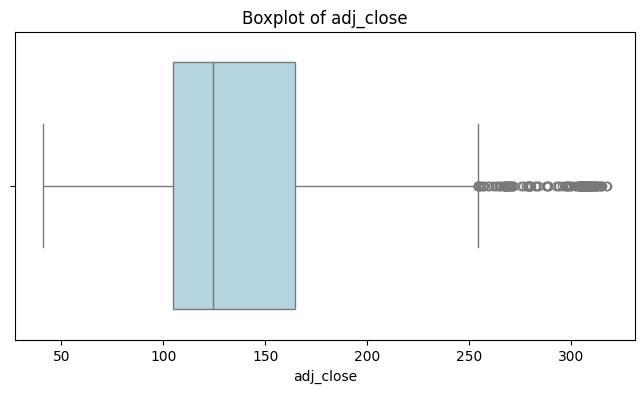

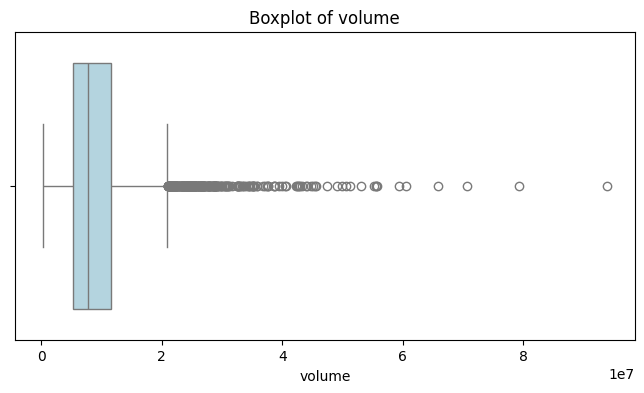

In [15]:
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


===== Correlation Matrix =====

               open      high       low     close  adj_close    volume
open       1.000000  1.000000  0.999911  0.999920   0.999823  0.127672
high       1.000000  1.000000  0.999911  0.999920   0.999823  0.127672
low        0.999911  0.999911  1.000000  0.999864   0.999919  0.133594
close      0.999920  0.999920  0.999864  1.000000   0.999894  0.122853
adj_close  0.999823  0.999823  0.999919  0.999894   1.000000  0.129357
volume     0.127672  0.127672  0.133594  0.122853   0.129357  1.000000


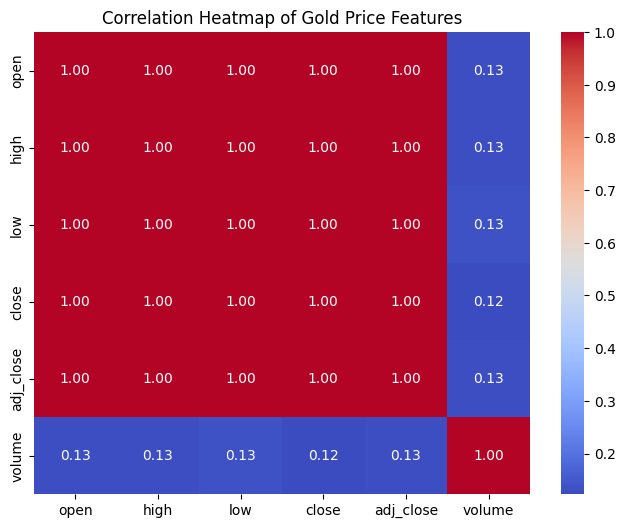

In [16]:
corr_matrix = df[features].corr()
print("\n===== Correlation Matrix =====\n")
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Gold Price Features")
plt.show()

In [19]:
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

print("\nIndependent Variables (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Independent Variables (X):
        open       high        low    volume
0  44.380001  44.380001  44.490002   5992000
1  44.779999  44.779999  44.919998  11655300
2  44.950001  44.950001  44.970001  11996000
3  44.750000  44.750000  44.919998   3169200
4  45.049999  45.049999  45.049999   6105100

Target Variable (y):
0    44.070000
1    44.470001
2    44.740002
3    44.720001
4    44.790001
Name: close, dtype: float64


In [21]:
X = df[['open', 'high', 'low', 'volume']]   # Features
y = df['close']   

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Model Performance:
MSE: 0.2584577487369329
RMSE: 0.5083874002539135
R² Score: 0.9999031349631181


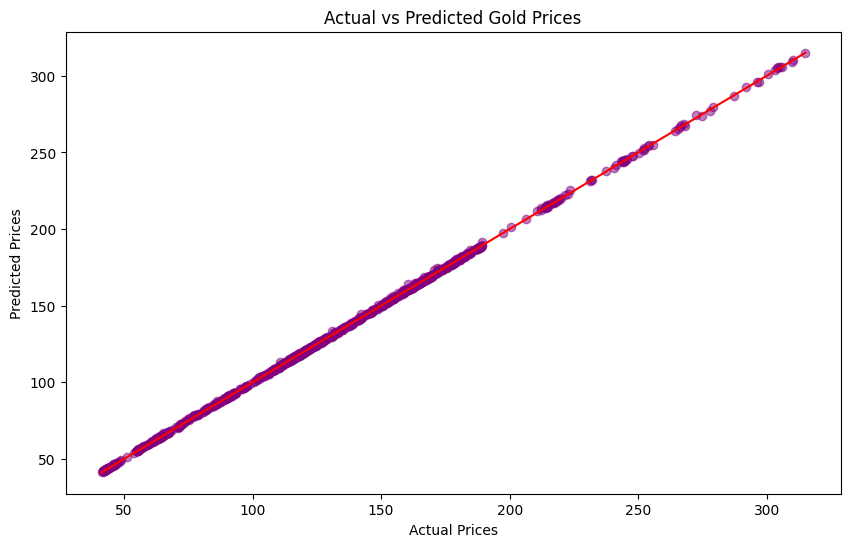

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red') # perfect prediction line
plt.show()

In [30]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nModel Coefficients:\n", coefficients)


Model Coefficients:
   Feature   Coefficient
2     low  4.188493e-01
0    open  2.881921e-01
1    high  2.881921e-01
3  volume -5.645234e-08
